# Módulo 17: Data Massaging 2
- Combinación de dataframes
- Funciones lamda aplicadas a dataframes
- Manejo de datos avanzados

In [2]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('d:/Documentos/DataAnalysis/EBAC/Python/Modulo16/netflix_titles_2.csv')

In [3]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
5759,s5760,TV Show,StoryBots Super Songs,NaN,"Judy Greer, Jeff Gill, Erin Fitzgerald, Fred T...",United States,"October 7, 2016",2016,TV-Y,1 Season,Kids' TV,Characters from the popular StoryBots apps for...,1.0,season
6216,s6217,TV Show,Badalte Rishton Ki Dastaan,NaN,"Additi Gupta, Sanjeeda Sheikh, Kiran Karmarkar...",India,"April 1, 2017",2013,TV-14,1 Season,"International TV Shows, TV Dramas","When a man is killed, his wife and his lover –...",1.0,season
2823,s2824,Movie,Miracle in Cell No. 7,Mehmet Ada Öztekin,"Aras Bulut İynemli, Nisa Sofiya Aksongur, Deni...",Turkey,"March 13, 2020",2019,TV-14,132 min,"Dramas, International Movies","Separated from his daughter, a father with an ...",132.0,min
2512,s2513,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,109.0,min
876,s877,TV Show,Alma Matters,NaN,NaN,India,"May 14, 2021",2021,TV-MA,1 Season,"Docuseries, International TV Shows",Alumni of India’s elite academic institutes sh...,1.0,season


In [4]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [5]:
print('El promedio es:', df['duration_num'].mean())

El promedio es: 69.84852957874418


In [6]:
# Calcular el total de horas para las películas
movies_minutes = df.loc[df['duration_unit'] == 'min', 'duration_num'].sum()

print(f'La duración total en horas de las películas de la base de datos es de {movies_minutes/60:.2f} horas')

La duración total en horas de las películas de la base de datos es de 10171.38 horas


<function matplotlib.pyplot.show(close=None, block=None)>

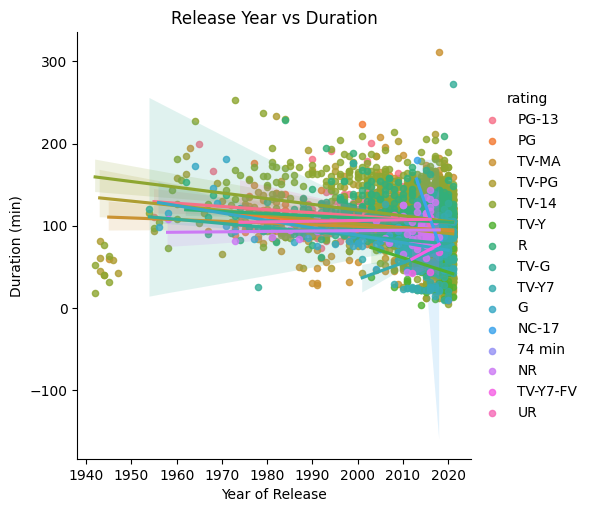

In [7]:
# ¿Las películas son más largas según su rating
subdf = df[['title', 'rating', 'duration_num', 'release_year']].loc[df['duration_unit'] == 'min']

import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='release_year', y='duration_num', data=subdf, fit_reg=True, scatter_kws={'marker':'D', 's':20}, hue='rating')
plt.title('Release Year vs Duration')
plt.xlabel('Year of Release')
plt.ylabel('Duration (min)')
plt.show


## Combinación y manejo de dataframes

In [24]:
# Nuevo df
clase = [('Jorge', 22, 'MX'),
            ('Anita', 31, 'MX'),
            ('Raul', 16, 'BR'),
            ('Simon', 41, 'BR'),
            ('Diego', 33, 'PA'),
            ('Jorge', 35, 'PA'),
            ('Almendra', 35, 'CO'),
            ('Mary', 35, 'CO'),
            ('Peter', 35, 'EC'),
            ('Andrés', 35, 'EC')
        ]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'País'])

In [9]:

clase2 = [  ('Jorge', 22, 'MX'),
            ('Gladys', 41, 'PA'),
            ('Sebastian', 36, 'BR')
]

df_clase2 = pd.DataFrame(clase2, columns=['Nombre', 'Edad', 'País'])

In [10]:
# Append dfs
df_clase = df_clase.append(df_clase2)
df_clase.reset_index(level=None, drop=True, inplace=True)
df_clase

C:\Users\CARLOS DEL VALLE\AppData\Local\Temp\ipykernel_14236\3771073419.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clase = df_clase.append(df_clase2)


,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


### Eliminación de datos

In [11]:
# Hacer un df para alterar
del_df_clase = df_clase

print(del_df_clase.drop(2))         # Elimina por index


       Nombre  Edad País
0       Jorge    22   MX
1       Anita    31   MX
3       Simon    41   BR
4       Diego    33   PA
5       Jorge    35   PA
6    Almendra    35  COL
7        Mary    35  COL
8       Peter    35   EC
9      Andrés    35   EC
10      Jorge    22   MX
11     Gladys    41   PA
12  Sebastian    36   BR


In [12]:
# Eliminación con base en condición
print(del_df_clase.drop(del_df_clase[del_df_clase['Edad'] < 40].index))

    Nombre  Edad País
3    Simon    41   BR
11  Gladys    41   PA


### Actualización de datos

In [13]:
# Copiar df para alterarlo
upd_df_clase = df_clase
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [14]:
upd_df_clase.loc[3,'Nombre'] = 'Ramón'
upd_df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Ramón,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [15]:
# Actualizar basado en una condición
upd_df_clase.loc[upd_df_clase[upd_df_clase['Edad'] == 41].index, 'Edad'] = 40
upd_df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Ramón,40,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [16]:
df_clase3 = df_clase


df_clase3.merge(df_clase2, left_on='Nombre', right_on='Nombre', how='left')

,Nombre,Edad_x,País_x,Edad_y,País_y
0,Jorge,22,MX,22.0,MX
1,Anita,31,MX,NaN,NaN
2,Raul,16,BR,NaN,NaN
3,Ramón,40,BR,NaN,NaN
4,Diego,33,PA,NaN,NaN
5,Jorge,35,PA,22.0,MX
6,Almendra,35,COL,NaN,NaN
7,Mary,35,COL,NaN,NaN
8,Peter,35,EC,NaN,NaN
9,Andrés,35,EC,NaN,NaN


In [17]:
df_clase3.merge(df_clase2, how='cross') # Combinación de todos los del primer df y todos los del segundo df

,Nombre_x,Edad_x,País_x,Nombre_y,Edad_y,País_y
0,Jorge,22,MX,Jorge,22,MX
1,Jorge,22,MX,Gladys,41,PA
2,Jorge,22,MX,Sebastian,36,BR
3,Anita,31,MX,Jorge,22,MX
4,Anita,31,MX,Gladys,41,PA
5,Anita,31,MX,Sebastian,36,BR
6,Raul,16,BR,Jorge,22,MX
7,Raul,16,BR,Gladys,41,PA
8,Raul,16,BR,Sebastian,36,BR
9,Ramón,40,BR,Jorge,22,MX


### Lambda Functions a Pandas DF (.apply(function))

In [25]:
df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'País'])
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,CO
7,Mary,35,CO
8,Peter,35,EC
9,Andrés,35,EC


In [26]:
# Función para buscar si la edad es par o impar
df_clase['Par-Impar'] = df_clase['Edad'].apply(lambda x : 'Impar' if int(x) % 2 else 'Par')
# Si x%2 sale 1 cuenta como True, por eso se asigna Impar, si sale cero cuenta como False

In [27]:
df_clase

,Nombre,Edad,País,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,Impar
2,Raul,16,BR,Par
3,Simon,41,BR,Impar
4,Diego,33,PA,Impar
5,Jorge,35,PA,Impar
6,Almendra,35,CO,Impar
7,Mary,35,CO,Impar
8,Peter,35,EC,Impar
9,Andrés,35,EC,Impar


In [29]:
# Apply por zona horaria dado el país:
import pytz

df_clase['Zona Horaria'] = df_clase['País'].apply(lambda x : pytz.country_timezones[x])
df_clase

,Nombre,Edad,País,Par-Impar,Zona Horaria
0,Jorge,22,MX,Par,"[America/Mexico_City, America/Cancun, America/..."
1,Anita,31,MX,Impar,"[America/Mexico_City, America/Cancun, America/..."
2,Raul,16,BR,Par,"[America/Noronha, America/Belem, America/Forta..."
3,Simon,41,BR,Impar,"[America/Noronha, America/Belem, America/Forta..."
4,Diego,33,PA,Impar,[America/Panama]
5,Jorge,35,PA,Impar,[America/Panama]
6,Almendra,35,CO,Impar,[America/Bogota]
7,Mary,35,CO,Impar,[America/Bogota]
8,Peter,35,EC,Impar,"[America/Guayaquil, Pacific/Galapagos]"
9,Andrés,35,EC,Impar,"[America/Guayaquil, Pacific/Galapagos]"


In [32]:
# Apply para conseguir el nombre completo del país
df_clase['NombrePaís'] = df_clase['País'].apply(lambda x : pytz.country_names[x])
df_clase

,Nombre,Edad,País,Par-Impar,Zona Horaria,NombrePaís
0,Jorge,22,MX,Par,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,MX,Impar,"[America/Mexico_City, America/Cancun, America/...",Mexico
2,Raul,16,BR,Par,"[America/Noronha, America/Belem, America/Forta...",Brazil
3,Simon,41,BR,Impar,"[America/Noronha, America/Belem, America/Forta...",Brazil
4,Diego,33,PA,Impar,[America/Panama],Panama
5,Jorge,35,PA,Impar,[America/Panama],Panama
6,Almendra,35,CO,Impar,[America/Bogota],Colombia
7,Mary,35,CO,Impar,[America/Bogota],Colombia
8,Peter,35,EC,Impar,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
9,Andrés,35,EC,Impar,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


### Bonus Track: pair plot

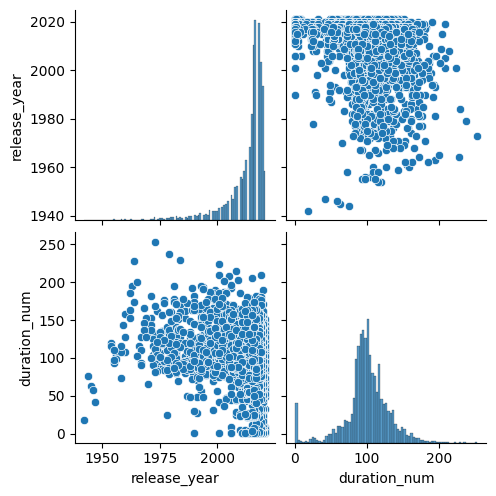

In [33]:
import seaborn as sns
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
sns.pairplot(df)

In [34]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0,season
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,min
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0,min
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


En el sns.pairplot() se imprimen diferentes gráficos, haciendo combinaciones entre las variables numéricas. En la diagonal (donde se serían la variable contra si misma) se pone un gráfico de distribución. En el resto de los gráficos son scatter plots contrastando las variables que se intersectan para ese gráfico.

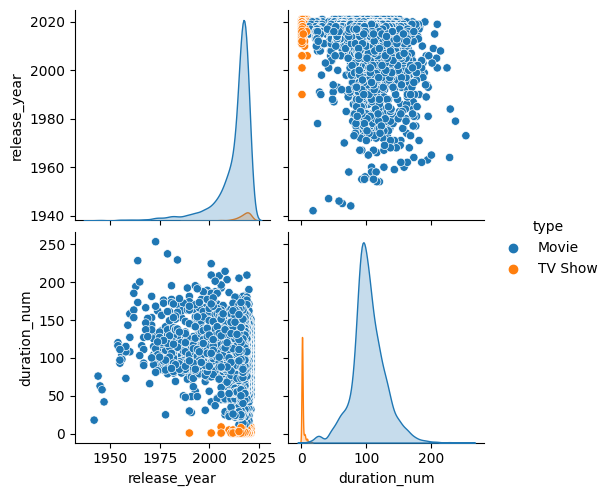

In [36]:
sns.pairplot(df, hue='type')